In [1]:
from data.loader import load_dataset, load_train_dataset
from models.u2net import U2NET, bce_loss

import matplotlib.pyplot as plt

import tensorflow as tf
import keras
import os

tf.debugging.disable_traceback_filtering()

In [2]:
TRAIN_PATH = "./datasets/DUTS/DUTS-TR/"
TEST_PATH = "./datasets/DUTS/DUTS-TE/"

IMAGE_SHAPE = (320, 320, 3)
MASK_SHAPE = (320, 320, 1)

# Training
BATCH_SIZE = 8
EPOCHS = 50
LEARNING_RATE = 0.001

In [3]:
def display(display_list, titles = ['Input Image', 'True Mask', 'Predicted Mask']):
    assert len(display_list) == len(titles), "Размер списка изображений должен соотвествовать размеру списка заголовков"
    
    plt.figure(figsize=(12, 12))
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(titles[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.show()

In [4]:
train_dataset = load_train_dataset(
    images_dir_path = os.path.join(TRAIN_PATH, "Image/*"),
    masks_dir_path = os.path.join(TRAIN_PATH, "Mask/*"),
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE,
    batch=BATCH_SIZE,
    needAugmentation=True
)

test_dataset = load_dataset(
    images_dir_path = os.path.join(TEST_PATH, "Image/*"),
    masks_dir_path = os.path.join(TEST_PATH, "Mask/*"),
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE
).batch(BATCH_SIZE)

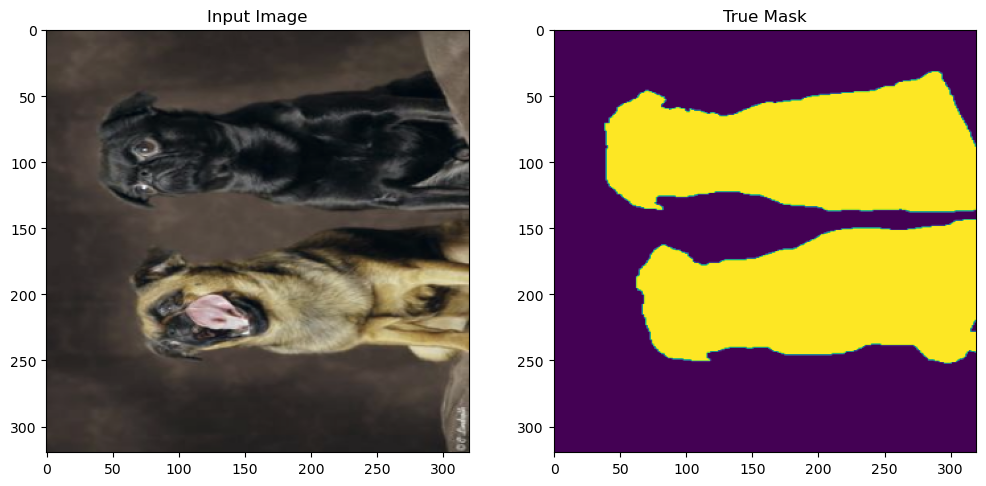

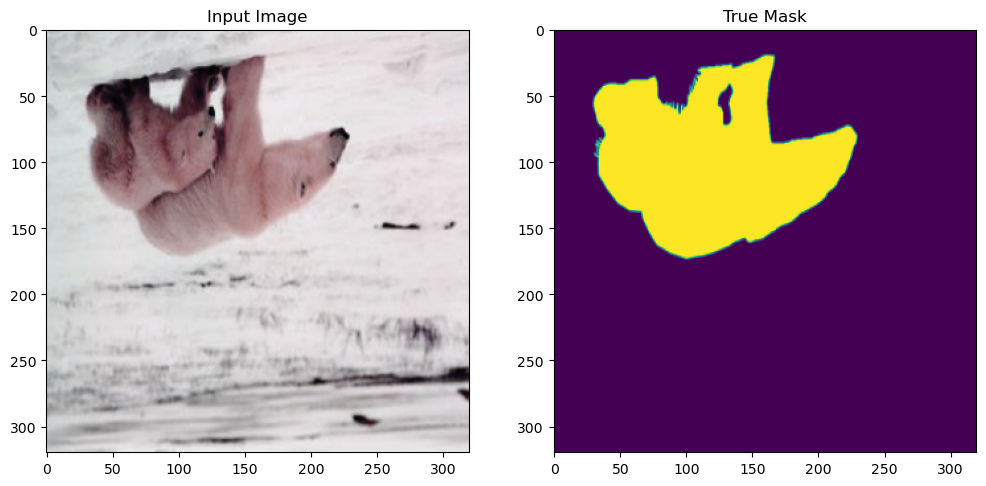

In [5]:
for images, masks in train_dataset.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask], ['Input Image', 'True Mask'])

In [8]:
adam = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=.9, beta_2=.999, epsilon=1e-08)
model = U2NET(shape_image=IMAGE_SHAPE)
model.compile(optimizer=adam, loss='binary_crossentropy',
              metrics=[['accuracy', 'mae', keras.metrics.MeanIoU(num_classes=2)]] + [None] * 6)

In [9]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir="./logs"),
    keras.callbacks.BackupAndRestore("./bkp"),
]

model.fit(train_dataset, validation_data=test_dataset, callbacks=callbacks, epochs=EPOCHS)
model.save('u2net.h5', include_optimizer=False)

Epoch 1/50
1320/1320 [==============================] - 725s 527ms/step - loss: 2.3903 - activation_2_loss: 0.3307 - activation_2_1_loss: 0.3239 - activation_2_2_loss: 0.3338 - activation_2_3_loss: 0.3446 - activation_2_4_loss: 0.3478 - activation_2_5_loss: 0.3448 - activation_2_6_loss: 0.3646 - activation_2_accuracy: 0.8295 - activation_2_mae: 0.2015 - activation_2_mean_io_u: 0.3756 - val_loss: 2.7459 - val_activation_2_loss: 0.3635 - val_activation_2_1_loss: 0.3686 - val_activation_2_2_loss: 0.4018 - val_activation_2_3_loss: 0.4076 - val_activation_2_4_loss: 0.4101 - val_activation_2_5_loss: 0.3695 - val_activation_2_6_loss: 0.4249 - val_activation_2_accuracy: 0.8370 - val_activation_2_mae: 0.2122 - val_activation_2_mean_io_u: 0.4330
Epoch 2/50
1320/1320 [==============================] - 697s 526ms/step - loss: 1.7758 - activation_2_loss: 0.2464 - activation_2_1_loss: 0.2439 - activation_2_2_loss: 0.2513 - activation_2_3_loss: 0.2540 - activation_2_4_loss: 0.2545 - activation_2_5_lo

Epoch 12/50
1320/1320 [==============================] - 697s 526ms/step - loss: 0.9494 - activation_2_loss: 0.1254 - activation_2_1_loss: 0.1259 - activation_2_2_loss: 0.1270 - activation_2_3_loss: 0.1288 - activation_2_4_loss: 0.1331 - activation_2_5_loss: 0.1431 - activation_2_6_loss: 0.1661 - activation_2_accuracy: 0.9159 - activation_2_mae: 0.0701 - activation_2_mean_io_u: 0.3756 - val_loss: 1.6580 - val_activation_2_loss: 0.2225 - val_activation_2_1_loss: 0.2215 - val_activation_2_2_loss: 0.2290 - val_activation_2_3_loss: 0.2364 - val_activation_2_4_loss: 0.2364 - val_activation_2_5_loss: 0.2474 - val_activation_2_6_loss: 0.2649 - val_activation_2_accuracy: 0.8900 - val_activation_2_mae: 0.1135 - val_activation_2_mean_io_u: 0.4330
Epoch 13/50
1320/1320 [==============================] - 696s 525ms/step - loss: 0.9154 - activation_2_loss: 0.1206 - activation_2_1_loss: 0.1212 - activation_2_2_loss: 0.1220 - activation_2_3_loss: 0.1240 - activation_2_4_loss: 0.1281 - activation_2_5_

Epoch 23/50
1320/1320 [==============================] - 696s 525ms/step - loss: 0.6969 - activation_2_loss: 0.0891 - activation_2_1_loss: 0.0894 - activation_2_2_loss: 0.0900 - activation_2_3_loss: 0.0915 - activation_2_4_loss: 0.0961 - activation_2_5_loss: 0.1073 - activation_2_6_loss: 0.1334 - activation_2_accuracy: 0.9293 - activation_2_mae: 0.0484 - activation_2_mean_io_u: 0.3757 - val_loss: 1.6000 - val_activation_2_loss: 0.2183 - val_activation_2_1_loss: 0.2168 - val_activation_2_2_loss: 0.2218 - val_activation_2_3_loss: 0.2247 - val_activation_2_4_loss: 0.2284 - val_activation_2_5_loss: 0.2360 - val_activation_2_6_loss: 0.2540 - val_activation_2_accuracy: 0.8990 - val_activation_2_mae: 0.0969 - val_activation_2_mean_io_u: 0.4330
Epoch 24/50
1320/1320 [==============================] - 697s 526ms/step - loss: 0.6860 - activation_2_loss: 0.0875 - activation_2_1_loss: 0.0878 - activation_2_2_loss: 0.0882 - activation_2_3_loss: 0.0898 - activation_2_4_loss: 0.0946 - activation_2_5_

Epoch 34/50
1320/1320 [==============================] - 695s 524ms/step - loss: 0.5599 - activation_2_loss: 0.0691 - activation_2_1_loss: 0.0693 - activation_2_2_loss: 0.0696 - activation_2_3_loss: 0.0710 - activation_2_4_loss: 0.0760 - activation_2_5_loss: 0.0878 - activation_2_6_loss: 0.1171 - activation_2_accuracy: 0.9368 - activation_2_mae: 0.0365 - activation_2_mean_io_u: 0.3757 - val_loss: 1.5166 - val_activation_2_loss: 0.2078 - val_activation_2_1_loss: 0.2060 - val_activation_2_2_loss: 0.2087 - val_activation_2_3_loss: 0.2084 - val_activation_2_4_loss: 0.2159 - val_activation_2_5_loss: 0.2258 - val_activation_2_6_loss: 0.2441 - val_activation_2_accuracy: 0.9051 - val_activation_2_mae: 0.0878 - val_activation_2_mean_io_u: 0.4330
Epoch 35/50
1320/1320 [==============================] - 695s 524ms/step - loss: 0.5398 - activation_2_loss: 0.0661 - activation_2_1_loss: 0.0662 - activation_2_2_loss: 0.0665 - activation_2_3_loss: 0.0681 - activation_2_4_loss: 0.0731 - activation_2_5_

Epoch 45/50
1320/1320 [==============================] - 694s 524ms/step - loss: 0.4696 - activation_2_loss: 0.0559 - activation_2_1_loss: 0.0560 - activation_2_2_loss: 0.0563 - activation_2_3_loss: 0.0577 - activation_2_4_loss: 0.0628 - activation_2_5_loss: 0.0751 - activation_2_6_loss: 0.1057 - activation_2_accuracy: 0.9410 - activation_2_mae: 0.0292 - activation_2_mean_io_u: 0.3760 - val_loss: 1.5413 - val_activation_2_loss: 0.2078 - val_activation_2_1_loss: 0.2104 - val_activation_2_2_loss: 0.2155 - val_activation_2_3_loss: 0.2131 - val_activation_2_4_loss: 0.2221 - val_activation_2_5_loss: 0.2295 - val_activation_2_6_loss: 0.2429 - val_activation_2_accuracy: 0.9057 - val_activation_2_mae: 0.0881 - val_activation_2_mean_io_u: 0.4330
Epoch 46/50
1320/1320 [==============================] - 695s 525ms/step - loss: 0.4713 - activation_2_loss: 0.0559 - activation_2_1_loss: 0.0560 - activation_2_2_loss: 0.0564 - activation_2_3_loss: 0.0578 - activation_2_4_loss: 0.0630 - activation_2_5_

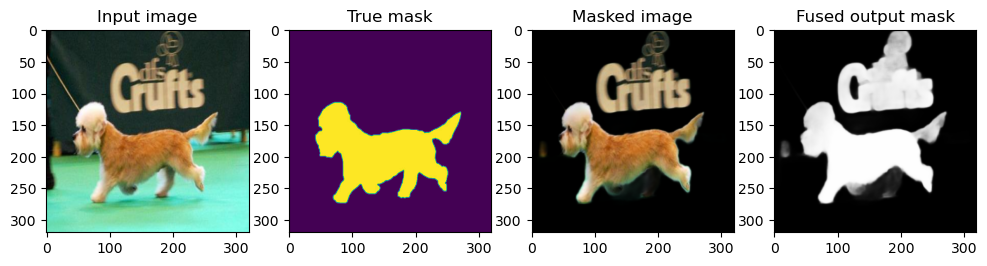

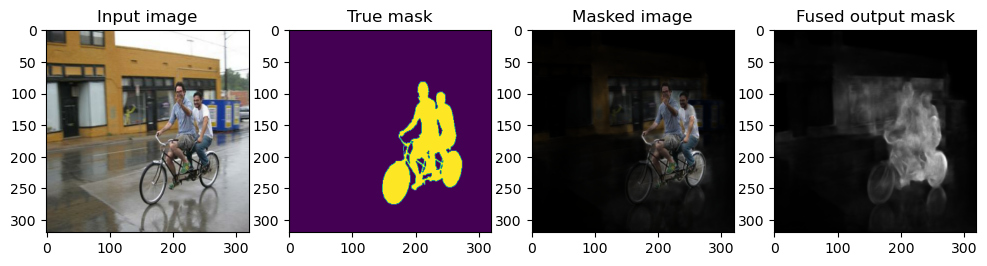

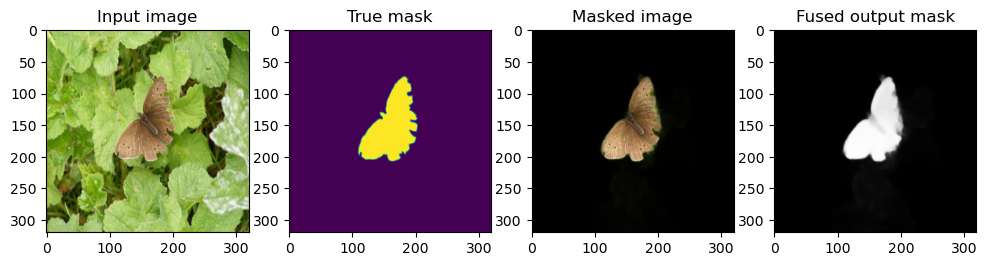

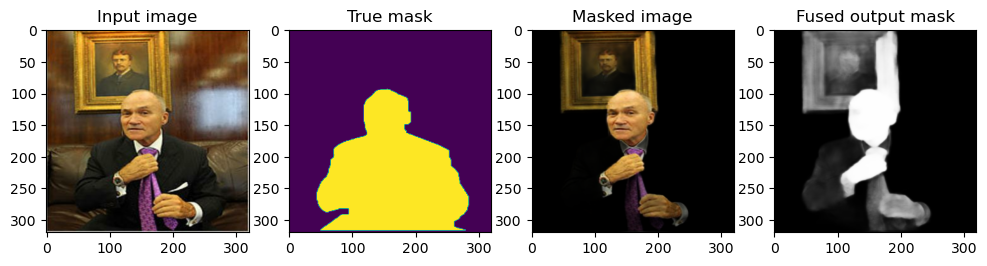

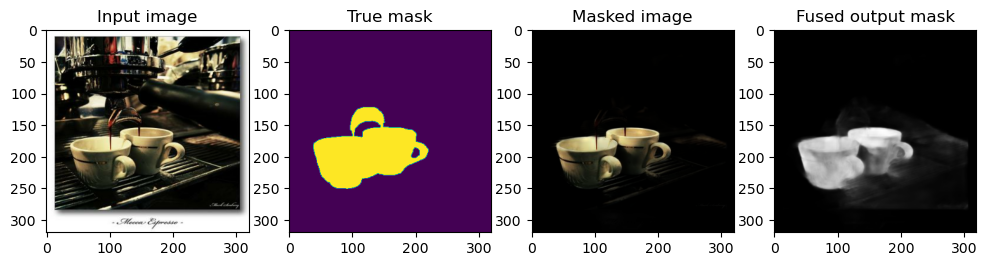

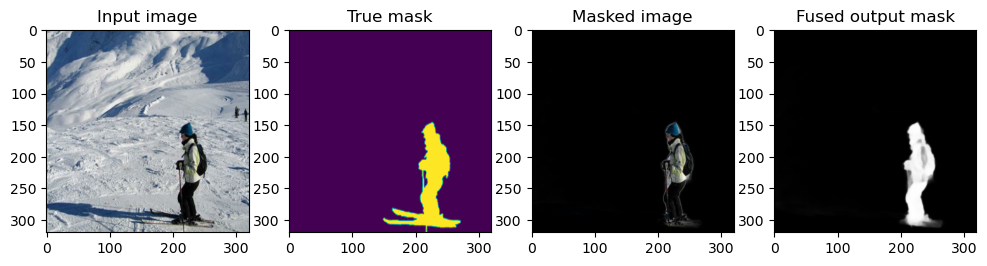

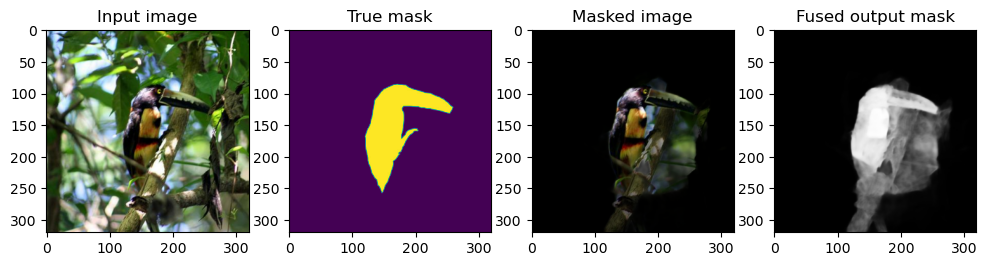

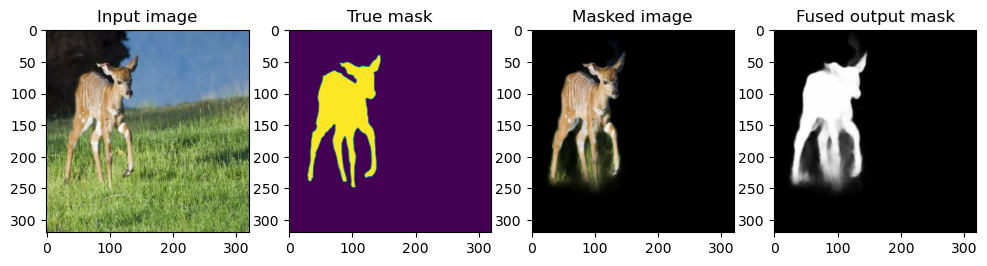

In [10]:
import numpy as np
for image, mask in test_dataset.take(1):
    out = model(image)
    for i in range(len(image)):
        display(
            [image[i], mask[i], np.multiply(image[i], np.tile(out[0][i], [1, 1, 3])), np.tile(out[0][i], [1, 1, 3])],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [11]:
saved_model = U2NET(shape_image=IMAGE_SHAPE)
saved_model.load_weights('u2net.h5')